# Data Analyst Skills Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import datetime
import pandas as pd
import numpy as np
import missingno as msno
from string import punctuation as punct
import datetime as dt

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [2]:
jobs_main = pd.read_csv('gsearch_jobs.csv')
jobs = jobs_main.copy()

# Drop irrelevant columns
jobs.drop(columns=['Unnamed: 0', 'index',
                   'thumbnail', 'job_id', 'commute_time'], inplace=True)

# Drop duplicates
jobs.drop_duplicates(inplace=True)
jobs.reset_index()

jobs.head(10)

,title,company_name,location,via,description,extensions,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,Ecommerce Analyst,24 Seven Talent,United States,via Trabajo.org,"The Business Analyst, Ecommerce & Digital mark...","['23 hours ago', 'Full-time', 'No degree menti...",23 hours ago,Full-time,NaN,NaN,data analyst,2022-11-25 06:00:55.301504,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
1,Business Consultant (Insurance Analytics) (US),Tiger Analytics,United States,via Adzuna,Tiger Analytics is an advanced analytics consu...,"['23 hours ago', 'Full-time']",23 hours ago,Full-time,NaN,NaN,data analyst,2022-11-26 04:00:08.912245,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'python']"
2,Strategy Analyst II - Financial Planning and A...,EDWARD JONES,"Bruner, MO",via CBS42 Jobs,"At Edward Jones, we help clients achieve their...","['19 hours ago', 'Full-time', 'Health insurance']",19 hours ago,Full-time,NaN,NaN,data analyst,2022-11-26 04:00:08.912245,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['powerpoint', 'excel', 'word']"
3,REMOTE / HYBRID - Healthcare Data Analyst / Cl...,SpectraMedix,"Kansas City, MO",via WANE Jobs,SpectraMedix: We provide actionable insights t...,"['1 hour ago', 'Full-time']",1 hour ago,Full-time,NaN,NaN,data analyst,2022-11-09 04:00:07.785567,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'tableau', 'python']"
4,"Manager, Strategic Research",Harnham US,United States,via Harnham,"MANAGER, STRATEGIC RESEARCH\n\n$105,000 - $110...","['1 hour ago', 'Full-time']",1 hour ago,Full-time,NaN,NaN,data analyst,2022-11-11 04:00:18.720591,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['spss', 'excel']"
5,Senior Data Analyst,Jobot,United States,via Monster,Senior Healthcare Data Analyst with Industry L...,"['1 hour ago', 'Full-time']",1 hour ago,Full-time,NaN,NaN,data analyst,2022-11-13 04:00:09.363159,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'sas', 'word', 'excel']"
6,"Sr. Analyst, Operations Data",Virgin Galactic,United States,via Virgin Galactic Careers,As an Operations Data Analyst you will support...,"['1 hour ago', 'Full-time']",1 hour ago,Full-time,NaN,NaN,data analyst,2022-11-21 04:00:16.457704,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['excel', 'power_bi']"
7,"Data Analyst, SEO Services & Strategy",CafeMedia,United States,via KSNT Jobs,CafeMedia's mission is to keep the promise of ...,"['1 hour ago', 'Full-time']",1 hour ago,Full-time,NaN,NaN,data analyst,2022-11-22 04:00:09.400658,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'tableau', 'looker', 'python']"
8,Retail Data Analyst,bp,United States,via Bp - Talentify,About the Role:\n\nThe Retail Data Analyst wil...,"['1 hour ago', 'Full-time', 'Health insurance']",1 hour ago,Full-time,NaN,NaN,data analyst,2022-11-22 04:00:12.977741,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['tableau', 'c', 'powerpoint', 'sap', 'excel',..."
9,Data Analyst,ChartSpan Medical Technologies,Anywhere,via LinkedIn,Job Summary:\n\nThe Senior Data Analyst manage...,"['1 hour ago', 'Work from home', 'Full-time']",1 hour ago,Full-time,True,NaN,data analyst,2022-11-07 15:17:02.596561,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'excel']"


In [3]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151 entries, 0 to 2150
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                2151 non-null   object 
 1   company_name         2151 non-null   object 
 2   location             2148 non-null   object 
 3   via                  2151 non-null   object 
 4   description          2151 non-null   object 
 5   extensions           2151 non-null   object 
 6   posted_at            2151 non-null   object 
 7   schedule_type        2141 non-null   object 
 8   work_from_home       1107 non-null   object 
 9   salary               425 non-null    object 
 10  search_term          2151 non-null   object 
 11  date_time            2151 non-null   object 
 12  search_location      2151 non-null   object 
 13  salary_pay           425 non-null    object 
 14  salary_rate          425 non-null    object 
 15  salary_avg           425 non-null    f

# Cleaning the Dataframe
The dataframe will be cleaned as follows:
1. We drop duplicates and irrelevant columns
2. We clean the 'via' column to 'via' from the records and update column name to listing_site
3. We handle null values in location & create a 'State' field from the location field.
4. We handle null values in schedule_type using the most frequent value, since this is a categorical feature.
5. We clean the description_token field to highlight top technical skills required for roles in the dataset.
6.

<AxesSubplot:>

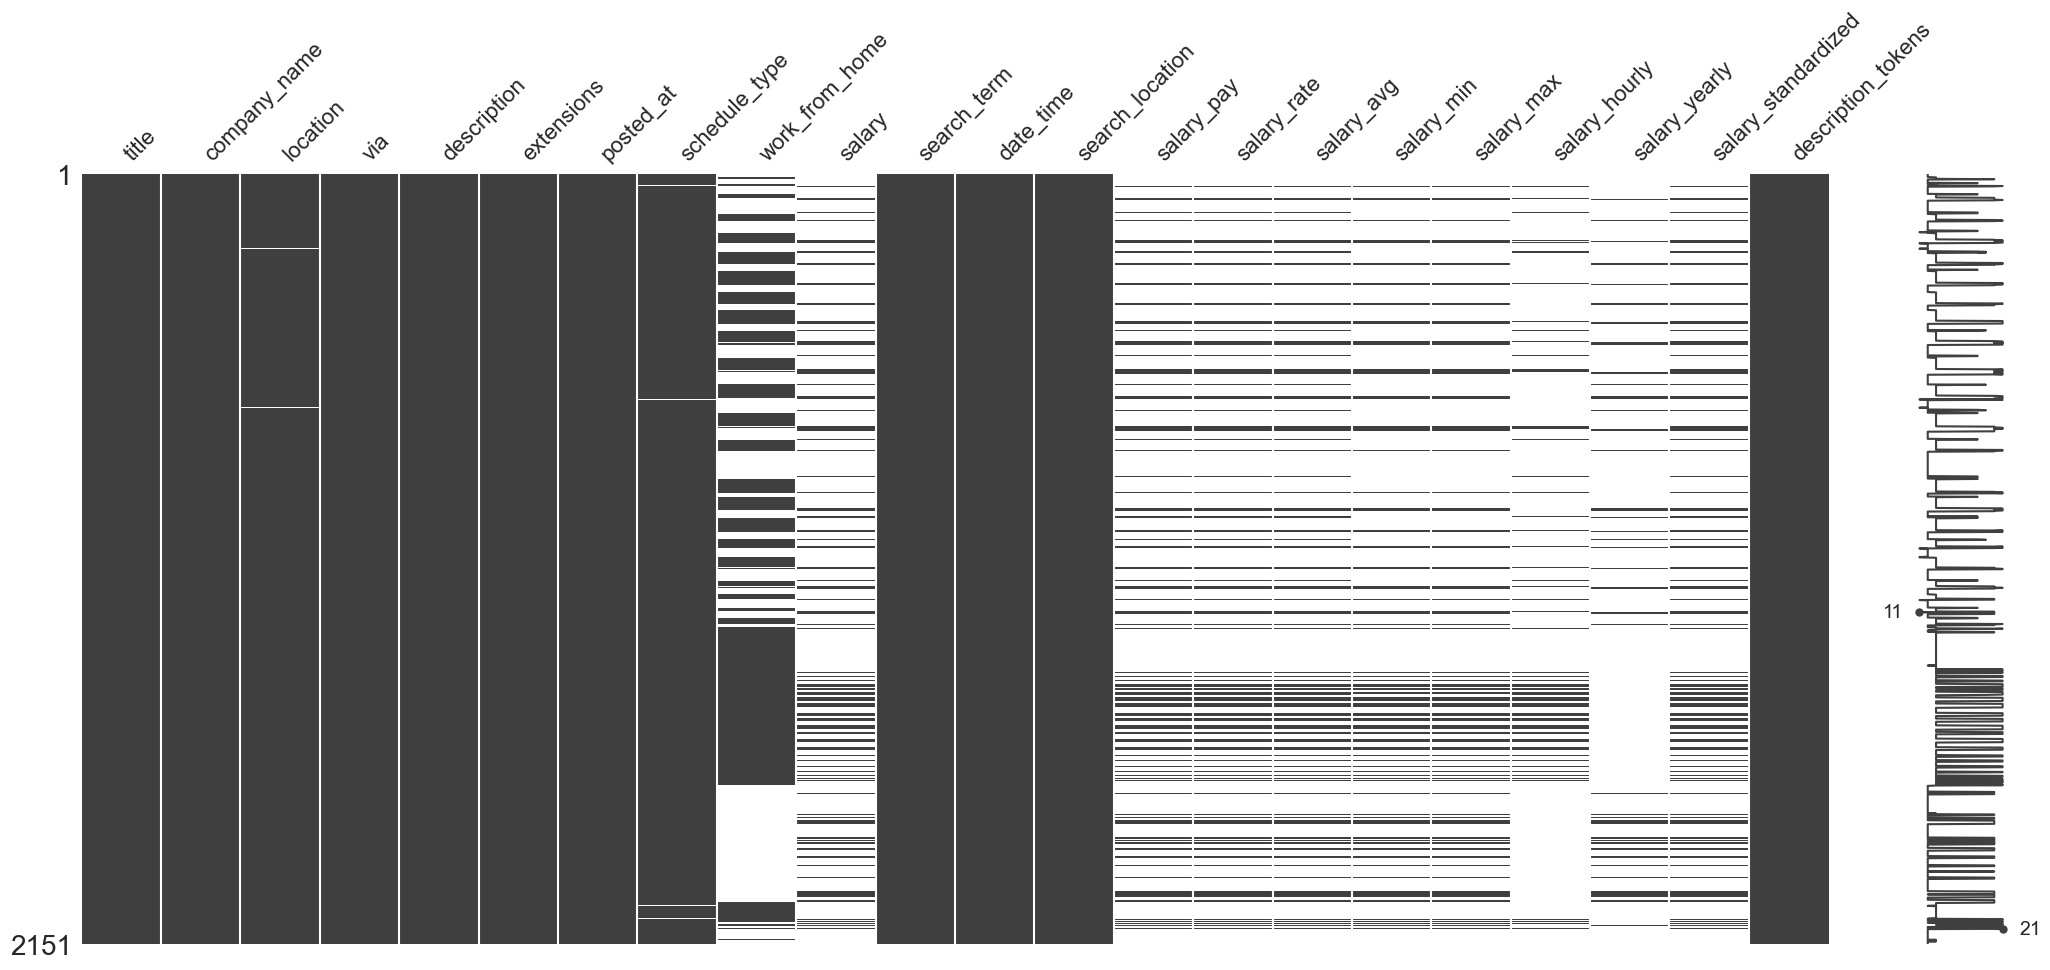

In [4]:
msno.matrix(jobs)

In [5]:
jobs.isnull().sum()

title                     0
company_name              0
location                  3
via                       0
description               0
extensions                0
posted_at                 0
schedule_type            10
work_from_home         1044
salary                 1726
search_term               0
date_time                 0
search_location           0
salary_pay             1726
salary_rate            1726
salary_avg             1726
salary_min             1767
salary_max             1767
salary_hourly          1918
salary_yearly          1961
salary_standardized    1726
description_tokens        0
dtype: int64

### Clean the 'via' column
Rename the column and using the series.apply() with a lambda function to remove 'via' from the records. The result is a series with the name of the sites where the jobs were listed.

In [6]:
# Rename and clean the 'via' column
jobs.rename(columns={'via':'listing_site'}, inplace=True)
jobs['listing_site'] = jobs['listing_site'].apply(lambda x: x[4:])

jobs.head()

,title,company_name,location,listing_site,description,extensions,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,Ecommerce Analyst,24 Seven Talent,United States,Trabajo.org,"The Business Analyst, Ecommerce & Digital mark...","['23 hours ago', 'Full-time', 'No degree menti...",23 hours ago,Full-time,NaN,NaN,data analyst,2022-11-25 06:00:55.301504,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
1,Business Consultant (Insurance Analytics) (US),Tiger Analytics,United States,Adzuna,Tiger Analytics is an advanced analytics consu...,"['23 hours ago', 'Full-time']",23 hours ago,Full-time,NaN,NaN,data analyst,2022-11-26 04:00:08.912245,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'python']"
2,Strategy Analyst II - Financial Planning and A...,EDWARD JONES,"Bruner, MO",CBS42 Jobs,"At Edward Jones, we help clients achieve their...","['19 hours ago', 'Full-time', 'Health insurance']",19 hours ago,Full-time,NaN,NaN,data analyst,2022-11-26 04:00:08.912245,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['powerpoint', 'excel', 'word']"
3,REMOTE / HYBRID - Healthcare Data Analyst / Cl...,SpectraMedix,"Kansas City, MO",WANE Jobs,SpectraMedix: We provide actionable insights t...,"['1 hour ago', 'Full-time']",1 hour ago,Full-time,NaN,NaN,data analyst,2022-11-09 04:00:07.785567,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['sql', 'tableau', 'python']"
4,"Manager, Strategic Research",Harnham US,United States,Harnham,"MANAGER, STRATEGIC RESEARCH\n\n$105,000 - $110...","['1 hour ago', 'Full-time']",1 hour ago,Full-time,NaN,NaN,data analyst,2022-11-11 04:00:18.720591,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['spss', 'excel']"


### Drop the extra salary columns
This is to let us conduct our own cleaning and analysis to determine what parameters 'salary' should be determined by/ displayed as.

In [7]:
jobs.drop(columns=['salary_pay', 'salary_rate', 'salary_avg', 'salary_min',
                   'salary_max', 'salary_hourly', 'salary_yearly', 'salary_standardized'], inplace=True)

### Clean date_time columns
Convert the date_time column from object datatype to datetime datatype. The resulting datatype 'M8\[ns]' is a form of datetime datatype.

In [8]:
jobs['date_time'] = pd.to_datetime(jobs['date_time'], errors='ignore')
jobs['date_time'].dtype

dtype('<M8[ns]')

### Handle nulls in location
Use the description field to determine the location of the job. Where unable, use 'United States' as the most popular country option and the single option in search_location.

In [9]:
jobs['location'].value_counts(dropna=False)

Anywhere                     1107
United States                 343
Kansas City, MO                61
Oklahoma City, OK              55
Jefferson City, MO             42
Missouri                       27
Springfield, MO                22
Columbia, MO                   18
Topeka, KS                     18
Bentonville, AR                16
Dearing, KS                    16
Tulsa, OK                      14
Wichita, KS                    11
Rolla, MO                      11
San Francisco, CA              11
Warrensburg, MO                 9
Enid, OK                        9
Kansas City, KS                 9
Lee's Summit, MO                8
Duke, MO                        8
California, MO                  7
Lenexa, KS                      6
Overland Park, KS               6
Mayview, MO                     5
Houstonia, MO                   5
Centralia, MO                   5
New Bloomfield, MO              5
Kingsville, MO                  5
Rogers, AR                      5
Home, KS      

In [10]:
jobs.loc[jobs['location'].isnull()]['description']

162    LaunchCode is a non-profit solving the tech ta...
208    The Company:\n\nWe are a Private Equity backed...
652    SpecChem, LLC supplies and services the concre...
Name: description, dtype: object

This record description shows that the location description is in Kansas City, MO. We'll update accordingly.

In [11]:
jobs.loc[jobs['location'].isnull()]['description'].loc[652]

"SpecChem, LLC supplies and services the concrete distributor network with quality construction chemicals that provide performance and value to the industry.\n\nWe are seeking an intelligent, energetic candidate for a full-time Operations Data Analyst position in our corporate headquarters located in Kansas City, MO...\n\nThe ideal candidate for this position has outstanding analytical, leadership, people, and problem-solving skills, thinks innovatively, and constantly strives for excellence and improvement.\n\nResponsibilities:\n• Work with plants nationwide to build and package operational reports\n• Track and analyze reports in order to identify areas of improvement in business procedures\n• Identify trends and variances in which positive changes can be made\n• Serve as liaison between all departments to support desired end result\n• Collect, consolidate, and input data (pricing, inventory and transactions), manually and electronically, into appropriate data systems\n• Build and mai

In [12]:
jobs.at[652, 'location'] = 'Kansas City, MO'
jobs['location'].value_counts()

Anywhere                     1107
United States                 343
Kansas City, MO                62
Oklahoma City, OK              55
Jefferson City, MO             42
Missouri                       27
Springfield, MO                22
Columbia, MO                   18
Topeka, KS                     18
Bentonville, AR                16
Dearing, KS                    16
Tulsa, OK                      14
San Francisco, CA              11
Rolla, MO                      11
Wichita, KS                    11
Kansas City, KS                 9
Warrensburg, MO                 9
Enid, OK                        9
Duke, MO                        8
Lee's Summit, MO                8
California, MO                  7
Lenexa, KS                      6
Overland Park, KS               6
Bruner, MO                      5
Home, KS                        5
Mountain View, CA               5
Houstonia, MO                   5
Mayview, MO                     5
Bates City, MO                  5
Kingsville, MO

Using .loc[] and index, update the remaining null values with 'United States'

In [13]:
jobs.loc[jobs['location'].isnull()].index

Int64Index([162, 208], dtype='int64')

In [14]:
jobs.loc[jobs.loc[jobs['location'].isnull()].index, 'location'] = 'United States'
jobs['location'].value_counts()

Anywhere                     1107
United States                 345
Kansas City, MO                62
Oklahoma City, OK              55
Jefferson City, MO             42
Missouri                       27
Springfield, MO                22
Columbia, MO                   18
Topeka, KS                     18
Bentonville, AR                16
Dearing, KS                    16
Tulsa, OK                      14
San Francisco, CA              11
Rolla, MO                      11
Wichita, KS                    11
Kansas City, KS                 9
Warrensburg, MO                 9
Enid, OK                        9
Duke, MO                        8
Lee's Summit, MO                8
California, MO                  7
Lenexa, KS                      6
Overland Park, KS               6
Bruner, MO                      5
Home, KS                        5
Mountain View, CA               5
Houstonia, MO                   5
Mayview, MO                     5
Bates City, MO                  5
Kingsville, MO

### Create a 'State' Column
Use the series.apply() method and a lambda function to separate state name from location where available and apply to a new field, 'state'. If no state exists, we'll apply the value in location to the state field.

In [15]:
jobs['state'] = jobs['location'].apply(lambda x: x[-2:] if ',' in x else x)
jobs['state'] = jobs['state'].apply(lambda x: 'KS' if x == 'Kansas' else x)
jobs['state'] = jobs['state'].apply(lambda x: 'MO' if x == 'Missouri' else x)
jobs['state'] = jobs['state'].apply(lambda x: 'OK' if x == 'Oklahoma' else x)
jobs['state'].value_counts(dropna=False)

Anywhere                     1107
MO                            412
United States                 345
OK                             98
KS                             90
AR                             50
CA                             45
United States (+1 other)        2
United States (+9 others)       1
United States (+2 others)       1
Name: state, dtype: int64

### Handle nulls in schedule_type
As a categorical column we'll use the mode to update the null values.

In [16]:
jobs['schedule_type'].value_counts(normalize=True, dropna=False)

Full-time     0.710367
Contractor    0.271967
Part-time     0.009298
NaN           0.004649
Internship    0.003719
Name: schedule_type, dtype: float64

In [17]:
# Handle nulls in schedule_type - using the max value
jobs.loc[jobs.loc[jobs['schedule_type'].isnull()].index, 'schedule_type'] = 'Full-time'
jobs['schedule_type'].value_counts(normalize=True, dropna=False)

Full-time     0.715016
Contractor    0.271967
Part-time     0.009298
Internship    0.003719
Name: schedule_type, dtype: float64

### Clean Description Token

In [18]:
jobs['description_tokens'].sample(10)

450                                     ['sql', 'looker']
1487            ['sql', 'splunk', 'python', 'javascript']
136        ['sql', 'tableau', 'outlook', 'word', 'excel']
1844                                                   []
987     ['sql', 'pl/sql', 'looker', 'mssql', 'bigquery...
1408                                                   []
1095                     ['word', 'spreadsheet', 'excel']
1761                                            ['excel']
879                ['sql', 'tableau', 'looker', 'python']
1546                                                   []
Name: description_tokens, dtype: object

Convert this column to a list

In [19]:
ts = jobs['description_tokens'].tolist()
ts[0:10]

['[]',
 "['sql', 'python']",
 "['powerpoint', 'excel', 'word']",
 "['sql', 'tableau', 'python']",
 "['spss', 'excel']",
 "['sql', 'sas', 'word', 'excel']",
 "['excel', 'power_bi']",
 "['sql', 'tableau', 'looker', 'python']",
 "['tableau', 'c', 'powerpoint', 'sap', 'excel', 'aws', 'power_bi', 'word']",
 "['sql', 'excel']"]

Clean the list to remove brackets and pass cleaned list to a new variable.

In [20]:
new_ts = list()
for i in ts:
    i = i.strip()
    if i == '':
        pass
    else:
        if '[' in i:
            i = i.replace('[', '')
        if ']' in i:
            i = i.replace(']', '')
        new_ts.append(i)

new_ts[0:10]

['',
 "'sql', 'python'",
 "'powerpoint', 'excel', 'word'",
 "'sql', 'tableau', 'python'",
 "'spss', 'excel'",
 "'sql', 'sas', 'word', 'excel'",
 "'excel', 'power_bi'",
 "'sql', 'tableau', 'looker', 'python'",
 "'tableau', 'c', 'powerpoint', 'sap', 'excel', 'aws', 'power_bi', 'word'",
 "'sql', 'excel'"]

Convert cleaned list back to string using the .join() method and the ',' as the separator. Also remove trailing spaces. This allows us to concatenate all the records as a single string by the ',' value instead of being separated like in the original list values.

In [21]:
ts_str = ','.join([str(elem) for elem in new_ts])
ts_str = ts_str.strip()
ts_str[:10]
# Result is a 10 character slice of the whole string

",'sql', 'p"

Create a copy of the string for further analysis so if we make any mistakes, we can start correcting from this point.

In [22]:
ch_ts = ts_str
ch_ts[:10]

",'sql', 'p"

Convert string to list again using the separator ',' and selecting only unique values using the set() function. Also clean the values by removing empty string values. The result is list of unique values

In [23]:
ch_ts = ch_ts.strip().split(',')
ch_ts = list(set(ch_ts))
ch_ts.remove('')
ch_ts[:10]

[" 'html'",
 " 'postgresql'",
 "'word'",
 "'spark'",
 " 'ssis'",
 " 'sas'",
 " 'mongo'",
 " 'unix'",
 " 'powershell'",
 " 'aurora'"]

Clean the list to remove trailing spaces and quotation marks. Sort resulting list in alphabetical order. The result is now a clear list of tech skills in data analysis.

In [24]:
tech_skills = list()
for i in ch_ts:
    a = i.strip()
    tech_skills.append(a[1:-1])

tech_skills = sorted(list(set(tech_skills)))

print(tech_skills, len(tech_skills))

['airflow', 'alteryx', 'asp.net', 'assembly', 'atlassian', 'aurora', 'aws', 'azure', 'bash', 'bigquery', 'bitbucket', 'c', 'c++', 'cobol', 'cognos', 'crystal', 'css', 'dax', 'docker', 'dplyr', 'excel', 'gcp', 'gdpr', 'ggplot2', 'git', 'github', 'gitlab', 'go', 'hadoop', 'html', 'java', 'javascript', 'jira', 'jquery', 'julia', 'jupyter', 'keras', 'linux', 'looker', 'matlab', 'matplotlib', 'microstrategy', 'mongo', 'mongodb', 'mssql', 'mysql', 'no-sql', 'node', 'nosql', 'numpy', 'outlook', 'pandas', 'perl', 'php', 'pl/sql', 'plotly', 'postgres', 'postgresql', 'power_bi', 'powerpoint', 'powershell', 'pyspark', 'python', 'pytorch', 'qlik', 'r', 'redis', 'redshift', 'ruby', 'rust', 'sap', 'sas', 'scala', 'scikit-learn', 'seaborn', 'selenium', 'sharepoint', 'shell', 'snowflake', 'spark', 'splunk', 'spreadsheet', 'spss', 'sql', 'ssis', 'ssrs', 'swift', 't-sql', 'tableau', 'tensorflow', 'terminal', 'unix', 'unix/linux', 'vb.net', 'vba', 'visio', 'visual_basic', 'word'] 98


Create a copy of the jobs dataframe, so that if any errors are made, we can correct them from this point.

Pass the values in the tech_skills list as columns in the jobs_copy dataframe.

In [25]:
jobs_copy = jobs.copy()
for i in tech_skills:
    jobs_copy[i] = 0

jobs_copy.head()

,title,company_name,location,listing_site,description,extensions,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,description_tokens,state,airflow,alteryx,asp.net,assembly,atlassian,aurora,aws,azure,bash,bigquery,bitbucket,c,c++,cobol,cognos,crystal,css,dax,docker,dplyr,excel,gcp,gdpr,ggplot2,git,github,gitlab,go,hadoop,html,java,javascript,jira,jquery,julia,jupyter,keras,linux,looker,matlab,matplotlib,microstrategy,mongo,mongodb,mssql,mysql,no-sql,node,nosql,numpy,outlook,pandas,perl,php,pl/sql,plotly,postgres,postgresql,power_bi,powerpoint,powershell,pyspark,python,pytorch,qlik,r,redis,redshift,ruby,rust,sap,sas,scala,scikit-learn,seaborn,selenium,sharepoint,shell,snowflake,spark,splunk,spreadsheet,spss,sql,ssis,ssrs,swift,t-sql,tableau,tensorflow,terminal,unix,unix/linux,vb.net,vba,visio,visual_basic,word
0,Ecommerce Analyst,24 Seven Talent,United States,Trabajo.org,"The Business Analyst, Ecommerce & Digital mark...","['23 hours ago', 'Full-time', 'No degree menti...",23 hours ago,Full-time,NaN,NaN,data analyst,2022-11-25 06:00:55.301504,United States,[],United States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Business Consultant (Insurance Analytics) (US),Tiger Analytics,United States,Adzuna,Tiger Analytics is an advanced analytics consu...,"['23 hours ago', 'Full-time']",23 hours ago,Full-time,NaN,NaN,data analyst,2022-11-26 04:00:08.912245,United States,"['sql', 'python']",United States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Strategy Analyst II - Financial Planning and A...,EDWARD JONES,"Bruner, MO",CBS42 Jobs,"At Edward Jones, we help clients achieve their...","['19 hours ago', 'Full-time', 'Health insurance']",19 hours ago,Full-time,NaN,NaN,data analyst,2022-11-26 04:00:08.912245,United States,"['powerpoint', 'excel', 'word']",MO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,REMOTE / HYBRID - Healthcare Data Analyst / Cl...,SpectraMedix,"Kansas City, MO",WANE Jobs,SpectraMedix: We provide actionable insights t...,"['1 hour ago', 'Full-time']",1 hour ago,Full-time,NaN,NaN,data analyst,2022-11-09 04:00:07.785567,United States,"['sql', 'tableau', 'python']",MO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Manager, Strategic Research",Harnham US,United States,Harnham,"MANAGER, STRATEGIC RESEARCH\n\n$105,000 - $110...","['1 hour ago', 'Full-time']",1 hour ago,Full-time,NaN,NaN,data analyst,2022-11-11 04:00:18.720591,United States,"['spss', 'excel']",United States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Create a function that assigns a 1 into the relevant record / field if they exist as skills in the description_tokens column.

In [26]:
def update_tech_skills(column, tech_list, df):
    for index, value in column.items():
        for i in tech_skills:
            if i in value:
                df.at[index, i] = 1

    return df

Apply function to dataframe and pass the result back to the dataframe variable.

In [27]:
jobs_copy = update_tech_skills(jobs_copy['description_tokens'], tech_skills, jobs_copy)
jobs_copy[tech_skills].sample(20)

,airflow,alteryx,asp.net,assembly,atlassian,aurora,aws,azure,bash,bigquery,bitbucket,c,c++,cobol,cognos,crystal,css,dax,docker,dplyr,excel,gcp,gdpr,ggplot2,git,github,gitlab,go,hadoop,html,java,javascript,jira,jquery,julia,jupyter,keras,linux,looker,matlab,matplotlib,microstrategy,mongo,mongodb,mssql,mysql,no-sql,node,nosql,numpy,outlook,pandas,perl,php,pl/sql,plotly,postgres,postgresql,power_bi,powerpoint,powershell,pyspark,python,pytorch,qlik,r,redis,redshift,ruby,rust,sap,sas,scala,scikit-learn,seaborn,selenium,sharepoint,shell,snowflake,spark,splunk,spreadsheet,spss,sql,ssis,ssrs,swift,t-sql,tableau,tensorflow,terminal,unix,unix/linux,vb.net,vba,visio,visual_basic,word
1269,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1646,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
623,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
290,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1604,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
308,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
265,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
883,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
for i in tech_skills:
    print(jobs_copy[i].value_counts(dropna=False))
    print('-'*8)

0    2133
1      18
Name: airflow, dtype: int64
--------
0    2106
1      45
Name: alteryx, dtype: int64
--------
0    2148
1       3
Name: asp.net, dtype: int64
--------
0    2147
1       4
Name: assembly, dtype: int64
--------
0    2145
1       6
Name: atlassian, dtype: int64
--------
0    2147
1       4
Name: aurora, dtype: int64
--------
0    2019
1     132
Name: aws, dtype: int64
--------
0    2028
1     123
Name: azure, dtype: int64
--------
0    2145
1       6
Name: bash, dtype: int64
--------
0    2128
1      23
Name: bigquery, dtype: int64
--------
0    2148
1       3
Name: bitbucket, dtype: int64
--------
0    1172
1     979
Name: c, dtype: int64
--------
0    2138
1      13
Name: c++, dtype: int64
--------
0    2146
1       5
Name: cobol, dtype: int64
--------
0    2131
1      20
Name: cognos, dtype: int64
--------
0    2143
1       8
Name: crystal, dtype: int64
--------
0    2140
1      11
Name: css, dtype: int64
--------
0    2126
1      25
Name: dax, dtype: int64
--------

### Drop tech skills columns with Values under 100
Given that there are 98 unique tech skills, this makes our dataframe too wide. We'll reduce the skills to those that appear more than 100 times in the dataset.

Let's drop the tech skills columns whose sums are under 100. The resulting dataframe has only 17 tech skills. This is better.

In [29]:
for i in tech_skills:
    if jobs_copy[i].sum() < 100:
        jobs_copy.drop(columns=i, inplace=True)

In [30]:
for i in tech_skills:
    if i in jobs_copy.columns:
        print(jobs_copy[i].value_counts(dropna=False))
        print('-'*8)

0    2019
1     132
Name: aws, dtype: int64
--------
0    2028
1     123
Name: azure, dtype: int64
--------
0    1172
1     979
Name: c, dtype: int64
--------
0    1314
1     837
Name: excel, dtype: int64
--------
0    2046
1     105
Name: hadoop, dtype: int64
--------
0    2042
1     109
Name: looker, dtype: int64
--------
0    1551
1     600
Name: power_bi, dtype: int64
--------
0    2005
1     146
Name: powerpoint, dtype: int64
--------
0    1456
1     695
Name: python, dtype: int64
--------
1    1206
0     945
Name: r, dtype: int64
--------
0    1834
1     317
Name: sas, dtype: int64
--------
0    1950
1     201
Name: snowflake, dtype: int64
--------
0    1963
1     188
Name: spss, dtype: int64
--------
1    1189
0     962
Name: sql, dtype: int64
--------
0    1528
1     623
Name: tableau, dtype: int64
--------
0    2047
1     104
Name: vba, dtype: int64
--------
0    2001
1     150
Name: word, dtype: int64
--------


In [31]:
jobs_copy.sample(10)

,title,company_name,location,listing_site,description,extensions,posted_at,schedule_type,work_from_home,salary,search_term,date_time,search_location,description_tokens,state,aws,azure,c,excel,hadoop,looker,power_bi,powerpoint,python,r,sas,snowflake,spss,sql,tableau,vba,word
314,Business Data Analyst - Now Hiring,Intuit,"Mountain View, CA",Snagajob,OverviewDo you have a passion for making huge ...,"['8 hours ago', 'Full-time']",8 hours ago,Full-time,NaN,NaN,data analyst,2022-11-12 04:00:09.677385,United States,"['tableau', 'python', 'r']",CA,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
277,Data Analyst,Loop,Anywhere,LinkedIn,Loop is in the unparalleled position to provid...,"['7 hours ago', 'Work from home', 'Full-time']",7 hours ago,Full-time,True,NaN,data analyst,2022-11-22 04:00:14.300270,United States,"['sql', 'tableau', 'looker', 'python', 'snowfl...",Anywhere,0,0,0,0,0,1,1,0,1,1,1,1,0,1,1,0,0
1791,Lead Data Analyst,EDWARD JONES,"Ponce De Leon, MO",Monster,"At Edward Jones, we help clients achieve their...","['2 hours ago', 'Full-time', 'Health insurance']",2 hours ago,Full-time,NaN,NaN,data analyst,2022-11-14 04:00:14.775723,United States,[],MO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1767,Data Analyst II (Healthcare Analytics),Corporate,Missouri,Big Country Jobs,You could be the one who changes everything fo...,"['20 hours ago', 'Full-time', 'Health insuranc...",20 hours ago,Full-time,NaN,NaN,data analyst,2022-11-13 04:00:09.363159,United States,"['sql', 'python', 'power_bi', 'excel']",MO,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,0
1808,Marketing Data & BI Analyst II,EDWARD JONES,"Warrensburg, MO",WANE Jobs,"At Edward Jones, we help clients achieve their...","['4 hours ago', '76,798–130,764 a year', 'Full...",4 hours ago,Full-time,NaN,"76,798–130,764 a year",data analyst,2022-11-15 04:00:32.540813,United States,"['sql', 'tableau', 'python', 'snowflake', 'exc...",MO,0,0,1,1,0,0,1,0,1,1,0,1,0,1,1,0,0
763,Data Analyst,RSEE Technologies,Anywhere,LinkedIn,"Role: Data Analyst\nLocation: San Francisco, C...","['14 hours ago', 'Work from home', 'Full-time'...",14 hours ago,Full-time,True,NaN,data analyst,2022-11-08 06:00:16.168218,United States,"['pl/sql', 'sql', 'excel']",Anywhere,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
746,Lead Data and Insights Analyst,Goodway Group,Anywhere,LinkedIn,Who We Are\n\nGoodway Group is a an independen...,"['14 hours ago', 'Work from home', 'Full-time']",14 hours ago,Full-time,True,NaN,data analyst,2022-11-12 04:00:24.745626,United States,"['sql', 'tableau', 'looker', 'python', 'linux'...",Anywhere,0,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0
690,Senior Data Analyst,Saks OFF 5TH,Anywhere,LinkedIn,What This Position is All About:\n\nWe are loo...,"['13 hours ago', 'Work from home', 'Full-time'...",13 hours ago,Full-time,True,NaN,data analyst,2022-11-24 04:00:16.776269,United States,"['sql', 'tableau', 'spark', 'python', 'snowfla...",Anywhere,1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0
241,Data Engineer/Analyst- Healthcare Data Mapper,Quantiphi,Anywhere,LinkedIn,Required Skills:\n\n2-3 years prior Healthcare...,"['6 hours ago', 'Work from home', 'Full-time',...",6 hours ago,Full-time,True,NaN,data analyst,2022-11-15 04:01:07.264897,United States,"['sql', 'snowflake', 'gcp', 'python', 'aws', '...",Anywhere,1,1,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0
247,Data Analyst,"Georgia IT, Inc.",Anywhere,LinkedIn,Data Analyst\n\nLocation: Remote (EST...\n\nDu...,"['6 hours ago', 'Work from home', 'Contractor'...",6 hours ago,Contractor,True,NaN,data analyst,2022-11-23 04:00:08.386377,United States,['sql'],Anywhere,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Drop irrelevant columns
Also rename state column to location.

In [32]:
jobs_copy.drop(columns=['location', 'posted_at', 'search_term', 'search_location', 'description_tokens'], inplace=True)
jobs.rename(columns={'state':'location'}, inplace=True)
jobs_copy.sample(5)

,title,company_name,listing_site,description,extensions,schedule_type,work_from_home,salary,date_time,state,aws,azure,c,excel,hadoop,looker,power_bi,powerpoint,python,r,sas,snowflake,spss,sql,tableau,vba,word
707,Financial Data Analyst,DevCare solutions,WREG Jobs,Job description\n\nMust Have...\n\nFinancial A...,"['13 hours ago', '47–55 an hour', 'Full-time',...",Full-time,NaN,47–55 an hour,2022-11-05 05:00:09.387558,United States,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0
1722,"Senior Paralegal III, Tech & Data Regulatory",Walmart,ZipRecruiter,Position Summary...\n\nWhat you'll do...\n\nIm...,"['18 hours ago', 'Full-time', 'No degree menti...",Full-time,NaN,NaN,2022-11-10 04:00:21.126447,AR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
500,"Expert, Operations Data Analyst (Flexible Loca...",Pacific Gas & Electric Company,Adzuna,We are looking for an Expert Data Analyst to j...,"['11 hours ago', 'Full-time', 'No degree menti...",Full-time,NaN,NaN,2022-11-12 04:00:12.806137,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
641,Senior data analyst,Levi Strauss,Lensa,"JOB DESCRIPTION\nAt Levi Strauss & Co, we are ...","['13 hours ago', 'Full-time']",Full-time,NaN,NaN,2022-11-12 04:00:09.677385,CA,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0
841,Data analyst,AdamsGabbert,Talent.com,Our Finance team is seeking a Business Data An...,"['15 hours ago', 'Full-time', 'No degree menti...",Full-time,NaN,NaN,2022-11-04 15:36:59.189898,KS,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


### Clean Salary Columns

In [33]:
jobs_copy['salary'].value_counts(dropna=False)

NaN                            1726
76,798–130,764 a year            52
17–45 an hour                    24
90,628–154,313 a year            14
106,916–182,047 a year           12
80K–100K a year                   9
38–70 an hour                     8
20 an hour                        7
40–75 an hour                     7
67K–83.7K a year                  5
70–115 an hour                    5
60–70 an hour                     4
45–50 an hour                     4
40–50 an hour                     4
60 an hour                        4
100K–120K a year                  3
60–80 an hour                     3
10–15 an hour                     3
30–40 an hour                     3
17–70 an hour                     3
12–35 an hour                     3
82.1K–162K a year                 3
40–55 an hour                     3
30–50 an hour                     3
15–30 an hour                     3
125K–165K a year                  3
20–50 an hour                     3
60K a year                  

Using series.apply() method and a lambda function, extract rate (hour, month, year) from the salary field and pass the result to a new field - salary_rate. This is relevant to help us know which salaries to convert to an hourly rate and by which conversion rate.

In [34]:
jobs_copy['salary_rate'] = jobs_copy['salary'].apply(lambda x: x[-5:] if type(x) == str else x)
jobs_copy['salary_rate'] = jobs_copy['salary_rate'].apply(lambda x: x.strip() if type(x) == str else x)
jobs_copy['salary_rate'] = jobs_copy['salary_rate'].apply(lambda x: 'N/A' if type(x) != str else x)
jobs_copy['salary_rate'].value_counts(dropna=False)

N/A      1726
hour      233
year      190
month       2
Name: salary_rate, dtype: int64

Remove the rate section from the salary records and convert nan values to 0.

In [35]:
jobs_copy['salary'] = jobs_copy['salary'].apply(lambda x: x[:-7].strip() if type(x) == str else 0)
jobs_copy['salary'].value_counts(dropna=False)

0                       1726
76,798–130,764            52
17–45                     24
90,628–154,313            14
106,916–182,047           12
80K–100K                   9
38–70                      8
20                         7
40–75                      7
67K–83.7K                  5
70–115                     5
60–70                      4
45–50                      4
40–50                      4
60                         4
100K–120K                  3
60–80                      3
10–15                      3
30–40                      3
17–70                      3
12–35                      3
82.1K–162K                 3
40–55                      3
30–50                      3
15–30                      3
125K–165K                  3
20–50                      3
60K                        2
55–62                      2
35                         2
90K–100K                   2
100K–115K                  2
126K–232K                  2
90K–120K                   2
100K          

Convert all values in the salary field to string datatype.
For records with '-' in their values, use that as a split separator and extract the resulting two values as min and max values. For those without, use their single values as min and max values.

The resulting two fields depict the salary range as minimum and maximum values.

In [36]:
jobs_copy['salary'] = jobs_copy['salary'].astype(str)

jobs_copy['salary_min'] = jobs_copy['salary'].apply(lambda x: x.split('–')[0] if len(x) > 3 else x)
jobs_copy['salary_max'] = jobs_copy['salary'].apply(lambda x: x.split('–')[-1] if len(x) > 3 else x)

Remove ',' in the records and replace 'K' with '000' to reflect thousands.

In [37]:
jobs_copy['salary_min'] = jobs_copy['salary_min'].str.replace(',','').str.replace('K','000', flags=re.I)
jobs_copy['salary_min'].value_counts()

0           1726
76798         52
17            32
40            22
30            16
60            16
20            16
15            15
90628         14
80000         13
10            13
106916        12
38            12
50            11
70            10
100000         8
75000          7
25             7
55             7
90000          7
45             6
12             6
60000          5
110000         5
67000          5
120000         4
35             4
115000         4
82.1000        3
65             3
70000          3
125000         3
47             3
85000          2
38963.26       2
72             2
50000          2
75             2
80             2
126000         2
99201          2
18             2
34             2
52             2
46759          2
85             2
40000          2
28             2
65000          2
5.4000         2
152000         2
180000         2
24             2
140000         2
89000          2
32             1
8              1
21             1
100           

In [38]:
jobs_copy['salary_max'] = jobs_copy['salary_max'].str.replace(',','').str.replace('K','000', flags=re.I)
jobs_copy['salary_max'].value_counts()

0            1726
130764         52
45             32
50             21
70             20
100000         16
154313         14
60             12
182047         12
30             12
20             12
55             11
35             11
75             11
25              9
120000          7
40              7
115             6
90000           5
83.7000         5
65              5
80              5
85000           5
150             5
15              4
110000          4
28              4
90              4
60000           4
33              3
65000           3
162000          3
115000          3
135000          3
160000          3
100             3
85              3
165000          3
125             3
79580.09        2
72              2
18              2
232000          2
130000          2
75000           2
62              2
63              2
112000          2
139000          2
68              2
80000           2
220000          2
140000          2
6000            2
245000          2
202000    

In [39]:
jobs_copy.loc[jobs_copy['salary_rate'] == 'year'][['salary_min', 'salary_max', 'salary_rate']]

,salary_min,salary_max,salary_rate
14,90000,100000,year
25,45000,45000,year
70,80000,110000,year
71,125000,165000,year
72,160000,170000,year
73,68694.19,133665.00,year
128,40000,70000,year
129,70000,80000,year
130,80000,90000,year
131,47446,71169,year


Convert the salary range values to float. For year_rate salary values under 200, add '00' to reflect true values.

In [40]:
jobs_copy[['salary_min', 'salary_max']] = jobs_copy[['salary_min', 'salary_max']].astype(float)

In [41]:
salary = jobs_copy[['salary_min', 'salary_max']].astype(float)
salary['salary_rate'] = jobs_copy['salary_rate']
salary.head()

,salary_min,salary_max,salary_rate
0,0.0,0.0,N/A
1,0.0,0.0,N/A
2,0.0,0.0,N/A
3,0.0,0.0,N/A
4,0.0,0.0,N/A


In [42]:
sal_str = salary.loc[(salary['salary_min'] < 200) & (salary['salary_rate'] == 'year')]['salary_min'].astype(str).str.replace('.','')
sal_str = sal_str.apply(lambda x: x + '00')
sal_str

415     74200
416     54400
417     82100
476     80800
557     91400
717     75200
937     82100
938     82100
939     97300
1155    40600
Name: salary_min, dtype: object

In [43]:
jobs_copy.loc[sal_str.index, 'salary_min'] = sal_str.astype(float)

In [44]:
salary.loc[(salary['salary_max'] < 200) & (salary['salary_rate'] == 'year')][['salary_min', 'salary_max', 'salary_rate']]

,salary_min,salary_max,salary_rate
1155,40.6,81.1,year
1725,67000.0,83.7,year
1726,67000.0,83.7,year
1729,67000.0,83.7,year
1730,67000.0,83.7,year
1731,67000.0,83.7,year


In [45]:
sal_str2 = salary.loc[(salary['salary_max'] < 200) & (salary['salary_rate'] == 'year')]['salary_max'].astype(str).str.replace('.','')
sal_str2 = sal_str2.apply(lambda x: x + '00')
sal_str2

1155    81100
1725    83700
1726    83700
1729    83700
1730    83700
1731    83700
Name: salary_max, dtype: object

In [46]:
jobs_copy.loc[sal_str2.index, 'salary_max'] = sal_str2.astype(float)

In [47]:
jobs_copy.loc[jobs_copy['salary_rate'] == 'year'][['salary_min', 'salary_max', 'salary_rate']]

,salary_min,salary_max,salary_rate
14,90000.00,100000.00,year
25,45000.00,45000.00,year
70,80000.00,110000.00,year
71,125000.00,165000.00,year
72,160000.00,170000.00,year
73,68694.19,133665.00,year
128,40000.00,70000.00,year
129,70000.00,80000.00,year
130,80000.00,90000.00,year
131,47446.00,71169.00,year


For year salary rate, divide values by 2080 (working hours in a year) where the

In [48]:
yr_sal_min = jobs_copy.loc[jobs_copy['salary_min'] > 200]['salary_min']
yr_sal_max = jobs_copy.loc[jobs_copy['salary_max'] > 10000]['salary_max']

In [49]:
len(yr_sal_max)

190

In [50]:
yr_sal_max

14      100000.00
25       45000.00
70      110000.00
71      165000.00
72      170000.00
73      133665.00
128      70000.00
129      80000.00
130      90000.00
131      71169.00
186      80000.00
187     100000.00
188     139000.00
189     139000.00
190     140000.00
192      95458.00
250     160000.00
251     160000.00
252     220000.00
253      85000.00
308      65000.00
309     165000.00
310     112000.00
361      90000.00
362      90000.00
364     135000.00
365     202000.00
366     245000.00
413     100000.00
414     160000.00
415      86000.00
416     107000.00
417     162000.00
469      60000.00
470      85000.00
471     100000.00
472     100000.00
473     100000.00
474     120000.00
475     145000.00
476     114000.00
508      60000.00
552      60000.00
553     100000.00
554     110000.00
555     120000.00
556     250000.00
557     223000.00
558     110513.90
559     116016.58
588     105000.00
621      85000.00
622     100000.00
623     100000.00
624     100000.00
625     10

In [51]:
yr_sal_max = round(yr_sal_max / 2080, 2)
yr_sal_min = round(yr_sal_min / 2080, 2)

yr_sal_max

14       48.08
25       21.63
70       52.88
71       79.33
72       81.73
73       64.26
128      33.65
129      38.46
130      43.27
131      34.22
186      38.46
187      48.08
188      66.83
189      66.83
190      67.31
192      45.89
250      76.92
251      76.92
252     105.77
253      40.87
308      31.25
309      79.33
310      53.85
361      43.27
362      43.27
364      64.90
365      97.12
366     117.79
413      48.08
414      76.92
415      41.35
416      51.44
417      77.88
469      28.85
470      40.87
471      48.08
472      48.08
473      48.08
474      57.69
475      69.71
476      54.81
508      28.85
552      28.85
553      48.08
554      52.88
555      57.69
556     120.19
557     107.21
558      53.13
559      55.78
588      50.48
621      40.87
622      48.08
623      48.08
624      48.08
625      48.08
626      57.69
627      55.29
628     111.54
630      55.97
658      28.85
660      43.27
667      48.08
713      52.88
714      57.69
715      55.29
716      7

In [52]:
jobs_copy.loc[yr_sal_min.index, 'salary_min'] = yr_sal_min
jobs_copy.loc[yr_sal_max.index, 'salary_max'] = yr_sal_max

In [53]:
jobs_copy.loc[jobs_copy.loc[jobs_copy['salary_rate'] == 'month'].index, 'salary_min'] = round(5400/195, 2)

jobs_copy.loc[jobs_copy.loc[jobs_copy['salary_rate'] == 'month'].index, 'salary_max'] = round(6000/195, 2)

In [54]:
jobs_copy.loc[jobs_copy['salary_rate'] == 'month'][['salary_min', 'salary_max', 'salary_rate']]

,salary_min,salary_max,salary_rate
363,27.69,30.77,month
1153,27.69,30.77,month


Drop irrelevant columns.

In [55]:
jobs_copy.drop(columns=['salary', 'salary_rate', ], inplace=True)
jobs_copy.rename(columns={'salary_min':'salary_min_hr', 'salary_max':'salary_max_hr'}, inplace=True)

jobs_copy.sample(15)

,title,company_name,listing_site,description,extensions,schedule_type,work_from_home,date_time,state,aws,azure,c,excel,hadoop,looker,power_bi,powerpoint,python,r,sas,snowflake,spss,sql,tableau,vba,word,salary_min_hr,salary_max_hr
578,Data Analyst 3 - Poker,NaturalMotion / Zynga,Startup Jobs,Zynga is a leading developer of the world’s mo...,"['12 hours ago', 'Full-time', 'Health insuranc...",Full-time,NaN,2022-11-23 04:00:10.698782,United States,1,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0.0,0.0
269,Data Scientist,Aditi Consulting,LinkedIn,Position Details:\n\nClient: Telecom...\n\nJob...,"['7 hours ago', 'Contractor']",Contractor,NaN,2022-11-18 04:00:27.153519,KS,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0.0,0.0
278,Senior Healthcare Data Analyst / Engineer,Empassion Health,LinkedIn,Empassion is Complete Care for patients with A...,"['7 hours ago', 'Work from home', 'Full-time',...",Full-time,True,2022-11-05 05:00:34.417717,Anywhere,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0.0,0.0
286,Sr. Forecasting Analyst – Remote,Maximus,LinkedIn,Job Introduction\n\nMaximus is looking for a S...,"['7 hours ago', 'Work from home', 'Full-time',...",Full-time,True,2022-11-18 04:00:27.153519,Anywhere,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0.0,0.0
1915,Data Analyst II - Firm Analytics,EDWARD JONES,Nexxt,"At Edward Jones, we help clients achieve their...","['16 hours ago', 'Full-time', 'Health insurance']",Full-time,NaN,2022-11-05 05:00:29.403610,MO,1,1,1,1,0,0,1,0,1,1,0,0,0,1,1,0,0,0.0,0.0
1795,Senior Performance Marketing (Data Analyst),EDWARD JONES,Monster,"At Edward Jones, we help clients achieve their...","['2 hours ago', 'Full-time', 'Health insurance']",Full-time,NaN,2022-11-14 04:00:16.105767,MO,0,0,1,1,1,0,1,0,1,1,1,0,1,1,1,1,0,0.0,0.0
1591,400 word stata analysis,Upwork,Upwork,"I have done the do file, copy of log file, ste...","['17 hours ago', 'Work from home', 'Contractor']",Contractor,True,2022-11-23 04:00:19.342936,Anywhere,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0
2120,Entry Level Data Analyst,"Staffigo Technical Services, LLC",Adzuna,Job description\n\nAbout us...\n\nStaffigo is ...,"['12 hours ago', 'Full-time']",Full-time,NaN,2022-11-18 04:00:17.393768,KS,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0.0,0.0
1709,(USA) Data Analyst III,Walmart,The Muse,Position Summary...\n\nWhat you'll do...\n\nWo...,"['4 hours ago', 'Full-time', 'Health insurance...",Full-time,NaN,2022-11-20 04:00:09.507061,AR,0,0,1,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0.0,0.0
1558,Looking for a Business/Data Analyst - Tableau ...,Upwork,Upwork,We are looking for an expert Tableau Developer...,"['15 hours ago', '10–15 an hour', 'Work from h...",Contractor,True,2022-11-17 04:00:16.223754,Anywhere,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,10.0,15.0


# Clean the Extensions column
We're trying to find out if there's salary information in the extensions field where there is none in the salary fields so we can update accordingly.

Let's make a copy of the dataset so if we make any errors we can correct them from this point.

In [56]:
jobs_2 = jobs_copy.copy()

In [57]:
ext_desc = jobs_2.loc[(jobs_2['salary_min_hr'] == 0) & (jobs_2['salary_max_hr'] == 0)][['extensions', 'description']]

ext_desc['extensions'].head()

0    ['23 hours ago', 'Full-time', 'No degree menti...
1                        ['23 hours ago', 'Full-time']
2    ['19 hours ago', 'Full-time', 'Health insurance']
3                          ['1 hour ago', 'Full-time']
4                          ['1 hour ago', 'Full-time']
Name: extensions, dtype: object

In [58]:
indexes = list()
for index, value in ext_desc['extensions'].items():
    for item in value:
        if 'per year' in value:
            indexes.append(index)
        elif 'per hour' in value:
            indexes.append(index)

indexes

[]

We will be dropping the extensions field as it contains no relevant salary information.

In [59]:
jobs_2.drop(columns=['extensions'], inplace=True)
jobs_2.head()

,title,company_name,listing_site,description,schedule_type,work_from_home,date_time,state,aws,azure,c,excel,hadoop,looker,power_bi,powerpoint,python,r,sas,snowflake,spss,sql,tableau,vba,word,salary_min_hr,salary_max_hr
0,Ecommerce Analyst,24 Seven Talent,Trabajo.org,"The Business Analyst, Ecommerce & Digital mark...",Full-time,NaN,2022-11-25 06:00:55.301504,United States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
1,Business Consultant (Insurance Analytics) (US),Tiger Analytics,Adzuna,Tiger Analytics is an advanced analytics consu...,Full-time,NaN,2022-11-26 04:00:08.912245,United States,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.0,0.0
2,Strategy Analyst II - Financial Planning and A...,EDWARD JONES,CBS42 Jobs,"At Edward Jones, we help clients achieve their...",Full-time,NaN,2022-11-26 04:00:08.912245,MO,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0.0,0.0
3,REMOTE / HYBRID - Healthcare Data Analyst / Cl...,SpectraMedix,WANE Jobs,SpectraMedix: We provide actionable insights t...,Full-time,NaN,2022-11-09 04:00:07.785567,MO,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0.0,0.0
4,"Manager, Strategic Research",Harnham US,Harnham,"MANAGER, STRATEGIC RESEARCH\n\n$105,000 - $110...",Full-time,NaN,2022-11-11 04:00:18.720591,United States,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0


In [60]:
ext_desc.drop(columns=['extensions'], inplace=True)
ext_desc.head()

,description
0,"The Business Analyst, Ecommerce & Digital mark..."
1,Tiger Analytics is an advanced analytics consu...
2,"At Edward Jones, we help clients achieve their..."
3,SpectraMedix: We provide actionable insights t...
4,"MANAGER, STRATEGIC RESEARCH\n\n$105,000 - $110..."


In [61]:
indexes = list()
for index, value in ext_desc.items():
    for item in value:
        if 'year' in value:
            indexes.append(index)
        elif 'hour' in value:
            indexes.append(index)

indexes

[]

We'll be dropping the description field as well as it contains no relevant salary information.

In [62]:
jobs_2.drop(columns=['description'], inplace=True)
jobs_2.head()

,title,company_name,listing_site,schedule_type,work_from_home,date_time,state,aws,azure,c,excel,hadoop,looker,power_bi,powerpoint,python,r,sas,snowflake,spss,sql,tableau,vba,word,salary_min_hr,salary_max_hr
0,Ecommerce Analyst,24 Seven Talent,Trabajo.org,Full-time,NaN,2022-11-25 06:00:55.301504,United States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
1,Business Consultant (Insurance Analytics) (US),Tiger Analytics,Adzuna,Full-time,NaN,2022-11-26 04:00:08.912245,United States,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.0,0.0
2,Strategy Analyst II - Financial Planning and A...,EDWARD JONES,CBS42 Jobs,Full-time,NaN,2022-11-26 04:00:08.912245,MO,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0.0,0.0
3,REMOTE / HYBRID - Healthcare Data Analyst / Cl...,SpectraMedix,WANE Jobs,Full-time,NaN,2022-11-09 04:00:07.785567,MO,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0.0,0.0
4,"Manager, Strategic Research",Harnham US,Harnham,Full-time,NaN,2022-11-11 04:00:18.720591,United States,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0


### Option 2

Sample Cleaning code for this project from Kaggle user [Julia Nesterenko](https://www.kaggle.com/code/nesterenkojul/data-analyst-skill-worth)

In [63]:
df = jobs_main.copy()
df = df.drop(columns=["Unnamed: 0", "index"])

In [64]:
# Format lists
remove_punct = lambda x: x.translate(str.maketrans('', '', punct)).split()
df.extensions = df.extensions.apply(remove_punct)
df.description_tokens = df.description_tokens.apply(remove_punct)
df.description = df.description.apply(remove_punct)
df[['description', 'extensions', 'description_tokens']].sample(10)

,description,extensions,description_tokens
481,"[Company, Description, We, help, the, world, s...","[11, hours, ago, Fulltime]","[python, r]"
1250,"[Job, Title, Data, Analyst, Location, Duluth, ...","[23, hours, ago, Work, from, home, Fulltime, N...",[sql]
235,"[Salesforce, Data, Analyst, 100, Remote, 6, Mo...","[6, hours, ago, Work, from, home, Fulltime, He...","[sql, tableau, python, powerbi, sas]"
1042,"[Role, Data, Analyst, with, AWS, QuickSight, L...","[18, hours, ago, 60–70, an, hour, Fulltime, No...","[sql, tableau, aws, powerbi]"
2027,"[At, Edward, Jones, we, help, clients, achieve...","[23, hours, ago, 76798–130764, a, year, Fullti...","[sql, tableau, python, snowflake, excel, power..."
369,"[PRODUCT, ANALYST, AdTech, Computer, Games, CA...","[9, hours, ago, Fulltime]",[powerbi]
269,"[Position, Details, Client, Telecom, Job, Titl...","[7, hours, ago, Contractor]","[sql, alteryx, excel]"
27,"[Its, fun, to, work, in, a, company, where, pe...","[2, hours, ago, Work, from, home, Fulltime]",[]
658,"[Elite, Insurance, Partners, ranks, in, the, t...","[13, hours, ago, 60K, a, year, Fulltime, Healt...","[sql, tableau, python, r, excel]"
115,"[Job, Description, Data, Analyst, III, Summary...","[4, hours, ago, Work, from, home, Fulltime, He...","[crystal, tableau, python, r, matplotlib]"


Compare with original.

In [65]:
jobs_main[['description', 'extensions', 'description_tokens']].sample(10)

,description,extensions,description_tokens
1410,Am in need of a good Data analysis to help me ...,"['6 hours ago', 'Work from home', 'Contractor'...",[]
1080,"• Job Tag:\n• Posted: September 28,2022\n...\n...","['19 hours ago', 'Work from home', 'Full-time']",[]
759,If you’re passionate about innovation and love...,"['14 hours ago', 'Work from home', 'Full-time'...","['sql', 'tableau', 'python', 'aws', 'r']"
1821,"At Edward Jones, we help clients achieve their...","['6 hours ago', 'Full-time']","['sql', 'tableau', 'pl/sql', 'vba', 'nosql', '..."
2059,Talentify helps candidates around the world to...,"['14 hours ago', 'Work from home', 'Full-time']","['sql', 'python', 'power_bi', 'excel', 'r']"
727,"At Edward Jones, we help clients achieve their...","['14 hours ago', 'Full-time', 'Health insurance']","['sql', 'spss', 'python', 'snowflake', 'sas', ..."
331,Job Summary\n\nTitle: Senior Data Analyst Mana...,"['8 hours ago', 'Work from home', 'Full-time']","['c', 'sql', 'alteryx', 'tableau', 'python', '..."
739,"Posted Date: Apr 6, 2022\nEmployment Type: Par...","['14 hours ago', 'Part-time']","['tableau', 'spark', 'python', 'outlook', 'sas..."
1988,"At Edward Jones, we help clients achieve their...","['21 hours ago', 'Full-time', 'Health insurance']",[]
1957,"At Edward Jones, we help clients achieve their...","['19 hours ago', 'Full-time', 'Health insurance']",[]


In [66]:
# Format dates
df.date_time = pd.to_datetime(df.date_time)
df.insert(14, "time_ago", df.date_time.apply(lambda x: dt.datetime.today() - x))
df.sample(5)

,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,work_from_home,salary,search_term,date_time,time_ago,search_location,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
1213,IT Data Analyst Intern,Farmers Insurance,Anywhere,via LinkedIn,"[We, are, Farmers, We, are…, more, than, just,...","[22, hours, ago, Work, from, home, Fulltime, H...",eyJqb2JfdGl0bGUiOiJJVCBEYXRhIEFuYWx5c3QgSW50ZX...,https://encrypted-tbn0.gstatic.com/images?q=tb...,22 hours ago,Full-time,True,NaN,data analyst,2022-11-13 04:00:16.661009,130 days 16:33:24.883284,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
1008,Data Analyst / Scientist - Associate Director,IHS Markit,United States,via LinkedIn,"[The, Role, Data, Analyst, Scientist, Associat...","[18, hours, ago, Fulltime]",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLyBTY2llbn...,https://encrypted-tbn0.gstatic.com/images?q=tb...,18 hours ago,Full-time,NaN,NaN,data analyst,2022-11-18 04:00:31.412467,125 days 16:33:10.130920,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[sql, shell, python, excel, powerbi, r]"
1839,Lead Data Analyst,EDWARD JONES,"Bates City, MO",via KHON2 Jobs,"[At, Edward, Jones, we, help, clients, achieve...","[6, hours, ago, Fulltime, Health, insurance]",eyJqb2JfdGl0bGUiOiJMZWFkIERhdGEgQW5hbHlzdCIsIm...,NaN,6 hours ago,Full-time,NaN,NaN,data analyst,2022-11-17 04:00:23.675949,126 days 16:33:17.870993,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
678,Client Data Analyst II,Mosaic North America,Anywhere,via LinkedIn,"[Mosaic, is, a, leading, North, American, Inte...","[13, hours, ago, Work, from, home, Fulltime]",eyJqb2JfdGl0bGUiOiJDbGllbnQgRGF0YSBBbmFseXN0IE...,https://encrypted-tbn0.gstatic.com/images?q=tb...,13 hours ago,Full-time,True,NaN,data analyst,2022-11-12 04:00:16.994087,131 days 16:33:24.547902,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[tableau, spss, python, powerbi, excel, r]"
1151,Data Analyst (Fraud) - REMOTE,Confidential,United States,via WREG Jobs,"[Data, Analyst, Fraud, 100, REMOTE, FullTime, ...","[20, hours, ago, 75K–85K, a, year, Fulltime, H...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgKEZyYXVkKS...,NaN,20 hours ago,Full-time,NaN,75K–85K a year,data analyst,2022-11-06 05:00:11.028652,137 days 15:33:30.515381,United States,NaN,75K–85K,a year,80000.0,75000.0,85000.0,NaN,80000.0,80000.0,"[sql, tableau, python, sas, excel]"


Step 1. Define Top 10 most popular (most frequently occurring) skills.
Step 2. Compute average yearly salaries for job postings that require those skills.

In [67]:
top = 10
skills = []
# add all skills to a list
for val in df.description_tokens.values:
    skills.extend(val)

# Get list of unique skills and their frequency in tuples
skills, counts = np.unique(skills, return_counts=True)

# Sort above list by frequency. Limit skills list to top N frequency
top_skill_count = sorted(zip(list(skills), list(counts)), key=lambda x: -x[1])[:top]

# Separate skills from frequency counts
top_skills = list(map(lambda x: x[0], top_skill_count))
top_counts = list(map(lambda x: x[1], top_skill_count))

# Get average annual standardized salary for all listings with skill in their description_tokens field.
salaries = []
for skill in top_skills:
    salaries.append(df[df.description_tokens.apply(lambda x: skill in x)].salary_standardized.mean())

# Map results to a df and sort by average salary
top_skills_df = pd.DataFrame({"skill": list(top_skills), "number_of_postings": top_counts,"avg_yearly_salary": map(round, salaries)})
top_skills_df = top_skills_df.sort_values("avg_yearly_salary", ascending=False)
top_skills_df

,skill,number_of_postings,avg_yearly_salary
5,r,518,109621
8,spss,188,108721
6,sas,317,106357
2,python,695,106157
4,tableau,623,105749
0,sql,1175,105238
7,snowflake,201,104157
3,powerbi,640,100444
1,excel,837,93646
9,word,150,92538


## Exploratory Data Analysis